# Stability vs operon size

Let's check if co-operonic genes tend to be more stable compared to non co-operonic genes. This will be something we want to note in the manuscript text.

Intuitively, it would make sense that _____

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import random
import textwrap
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import paths, utils, annotations

random.seed(1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Load data

In [2]:
# Input similarity scores and annotations filenames
# Since the results are similar we only need to look at the scores for one strain type
pao1_similarity_filename = "pao1_core_similarity_associations_final_spell.tsv"
pa14_similarity_filename = "pa14_core_similarity_associations_final_spell.tsv"

In [3]:
# Import df
pao1_similarity = pd.read_csv(pao1_similarity_filename, sep="\t", index_col=0, header=0)
pa14_similarity = pd.read_csv(pa14_similarity_filename, sep="\t", index_col=0, header=0)

In [4]:
print(pao1_similarity.shape)
pao1_similarity.head()

(5349, 16)


,PA14 homolog id,Transcriptional similarity across strains,P-value,Name,label,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression,pathways present,Related acc genes
PAO1 id,,,,,,,,,,,,,,,,
PA0118,PA14_01440,0.290443,1.771504e-104,NaN,NaN,84.379666,87.012773,0.000000,30.805250,56.083433,98.678794,743.594397,7.571223e+03,743.594397,[],NaN
PA1859,PA14_40440,0.143328,5.986934e-26,NaN,NaN,106.687908,91.482549,0.000000,50.280627,78.021322,118.345717,584.117921,8.369057e+03,584.117921,[],NaN
PA3190,PA14_22980,0.257508,9.170620e-82,NaN,NaN,2974.728597,4619.591491,0.000000,477.708748,1386.138060,3291.525419,41815.193043,2.134063e+07,41815.193043,['path:pae02010 : ABC transporters'],NaN
PA1009,PA14_51280,0.549950,0.000000e+00,NaN,NaN,448.628362,387.755818,18.128903,238.075927,370.338444,543.930949,5826.229102,1.503546e+05,5808.100199,[],NaN
PA1065,PA14_50620,0.329633,9.188709e-136,NaN,NaN,105.604816,85.534956,0.000000,47.418993,82.907779,144.322724,707.184303,7.316229e+03,707.184303,[],NaN


In [5]:
print(pa14_similarity.shape)
pa14_similarity.head()

(5347, 16)


,PAO1 homolog id,Transcriptional similarity across strains,P-value,Name,label,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression,pathways present,Related acc genes
PA14 id,,,,,,,,,,,,,,,,
PA14_23690,PA3125,0.185094,2.030432e-42,NaN,NaN,85.595452,101.121951,0.000000,25.546082,51.093537,104.536787,709.117909,1.022565e+04,709.117909,[],NaN
PA14_11480,PA4049,0.327795,3.869112e-134,NaN,NaN,198.132451,121.601925,0.000000,125.119670,168.451503,230.506602,1084.278966,1.478703e+04,1084.278966,[],NaN
PA14_01150,PA0094,0.418704,4.989573e-226,NaN,NaN,105.290577,111.218985,0.000000,39.297006,75.807135,124.150007,860.205738,1.236966e+04,860.205738,[],NaN
PA14_11460,PA4051,0.541759,0.000000e+00,thiL,NaN,234.395250,177.782645,16.650153,110.935215,188.025557,300.223243,1008.676242,3.160667e+04,992.026089,['path:pau00730 : Thiamine metabolism'],NaN
PA14_56780,PA4366,0.482227,1.451201e-309,sodB,NaN,7781.835203,7633.163594,412.593023,3450.004296,5718.029115,8591.327252,72482.666616,5.826519e+07,72070.073593,[],NaN


## Load operon infromation

In [6]:
pao1_operon_filename = paths.PAO1_OPERON
pa14_operon_filename = paths.PA14_OPERON

In [7]:
pao1_operon = annotations.load_format_operons(pao1_operon_filename)
pa14_operon = annotations.load_format_operons(pa14_operon_filename)

In [8]:
print(pao1_operon.shape)
pao1_operon.head()

(3569, 1)


,operon_name
locus_tag,
PA0001,dnaA-dnaN-recF-gyrB
PA0002,dnaA-dnaN-recF-gyrB
PA0003,dnaA-dnaN-recF-gyrB
PA0004,dnaA-dnaN-recF-gyrB
PA0005,PA0006-lptA


In [9]:
print(pa14_operon.shape)
pa14_operon.head()

(3756, 1)


,operon_name
locus_tag,
PA14_00010,dnaA-dnaN-recF-gyrB
PA14_00020,dnaA-dnaN-recF-gyrB
PA14_00030,dnaA-dnaN-recF-gyrB
PA14_00050,dnaA-dnaN-recF-gyrB
PA14_00060,PA14_00070-PA14_00060


In [10]:
# Add operon size column
pao1_operon_size = pao1_operon.value_counts().to_frame("operon_size")
pa14_operon_size = pa14_operon.value_counts().to_frame("operon_size")

In [11]:
# Merge gene id and operon size
pao1_operon_info = pao1_operon.merge(
    pao1_operon_size, left_on="operon_name", right_index=True
)
pa14_operon_info = pa14_operon.merge(
    pa14_operon_size, left_on="operon_name", right_index=True
)
pao1_operon_info.head(10)

,operon_name,operon_size
locus_tag,,
PA0001,dnaA-dnaN-recF-gyrB,4
PA0002,dnaA-dnaN-recF-gyrB,4
PA0003,dnaA-dnaN-recF-gyrB,4
PA0004,dnaA-dnaN-recF-gyrB,4
PA0005,PA0006-lptA,2
PA0006,PA0006-lptA,2
PA0008,glyQ-glyS,2
PA0009,glyQ-glyS,2
PA0016,fmt-PA0017-trkA,3


In [12]:
pa14_operon_info.head(10)

,operon_name,operon_size
locus_tag,,
PA14_00010,dnaA-dnaN-recF-gyrB,4
PA14_00020,dnaA-dnaN-recF-gyrB,4
PA14_00030,dnaA-dnaN-recF-gyrB,4
PA14_00050,dnaA-dnaN-recF-gyrB,4
PA14_00060,PA14_00070-PA14_00060,2
PA14_00070,PA14_00070-PA14_00060,2
PA14_00090,glyQ-glyS,2
PA14_00100,glyQ-glyS,2
PA14_00170,def-fmt-PA14_00180-trkA,4


 ## Merge operon metadata and stability data

In [13]:
pao1_similarity_operon = pao1_similarity.merge(
    pao1_operon_info, left_index=True, right_index=True, how="left"
)
pa14_similarity_operon = pa14_similarity.merge(
    pa14_operon_info, left_index=True, right_index=True, how="left"
)

In [14]:
print(pao1_similarity_operon.shape)
pao1_similarity_operon.head()

(5349, 18)


,PA14 homolog id,Transcriptional similarity across strains,P-value,Name,label,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression,pathways present,Related acc genes,operon_name,operon_size
PAO1 id,,,,,,,,,,,,,,,,,,
PA0118,PA14_01440,0.290443,1.771504e-104,NaN,NaN,84.379666,87.012773,0.000000,30.805250,56.083433,98.678794,743.594397,7.571223e+03,743.594397,[],NaN,PA0117-PA0118,2.0
PA1859,PA14_40440,0.143328,5.986934e-26,NaN,NaN,106.687908,91.482549,0.000000,50.280627,78.021322,118.345717,584.117921,8.369057e+03,584.117921,[],NaN,PA1859-str,2.0
PA3190,PA14_22980,0.257508,9.170620e-82,NaN,NaN,2974.728597,4619.591491,0.000000,477.708748,1386.138060,3291.525419,41815.193043,2.134063e+07,41815.193043,['path:pae02010 : ABC transporters'],NaN,NaN,NaN
PA1009,PA14_51280,0.549950,0.000000e+00,NaN,NaN,448.628362,387.755818,18.128903,238.075927,370.338444,543.930949,5826.229102,1.503546e+05,5808.100199,[],NaN,PA1009-bcp,2.0
PA1065,PA14_50620,0.329633,9.188709e-136,NaN,NaN,105.604816,85.534956,0.000000,47.418993,82.907779,144.322724,707.184303,7.316229e+03,707.184303,[],NaN,NaN,NaN


In [15]:
print(pa14_similarity_operon.shape)
pa14_similarity_operon.head()

(5347, 18)


,PAO1 homolog id,Transcriptional similarity across strains,P-value,Name,label,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression,pathways present,Related acc genes,operon_name,operon_size
PA14 id,,,,,,,,,,,,,,,,,,
PA14_23690,PA3125,0.185094,2.030432e-42,NaN,NaN,85.595452,101.121951,0.000000,25.546082,51.093537,104.536787,709.117909,1.022565e+04,709.117909,[],NaN,NaN,NaN
PA14_11480,PA4049,0.327795,3.869112e-134,NaN,NaN,198.132451,121.601925,0.000000,125.119670,168.451503,230.506602,1084.278966,1.478703e+04,1084.278966,[],NaN,ribH-nusB-thiL-pgpA-PA14_11480-PA14_11490,6.0
PA14_01150,PA0094,0.418704,4.989573e-226,NaN,NaN,105.290577,111.218985,0.000000,39.297006,75.807135,124.150007,860.205738,1.236966e+04,860.205738,[],NaN,NaN,NaN
PA14_11460,PA4051,0.541759,0.000000e+00,thiL,NaN,234.395250,177.782645,16.650153,110.935215,188.025557,300.223243,1008.676242,3.160667e+04,992.026089,['path:pau00730 : Thiamine metabolism'],NaN,ribH-nusB-thiL-pgpA-PA14_11480-PA14_11490,6.0
PA14_56780,PA4366,0.482227,1.451201e-309,sodB,NaN,7781.835203,7633.163594,412.593023,3450.004296,5718.029115,8591.327252,72482.666616,5.826519e+07,72070.073593,[],NaN,NaN,NaN


## Plot

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


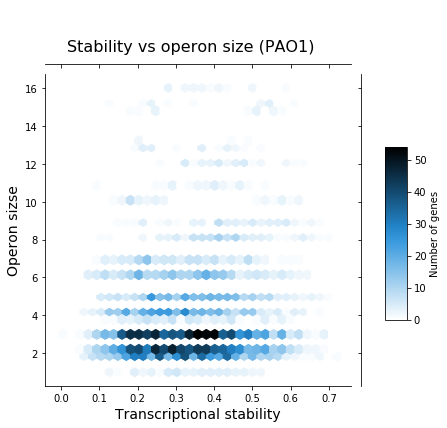

In [16]:
# Correlation plot of stability vs operon size
# This will only show the relationship for genes within an operon
# Plot correlation
fig = sns.jointplot(
    data=pao1_similarity_operon,
    x="Transcriptional similarity across strains",
    y="operon_size",
    kind="hex",
    marginal_kws={"color": "white", "edgecolor": "white"},
)

cbar_ax = fig.fig.add_axes([0.9, 0.25, 0.05, 0.4])  # x, y, width, height
cb = plt.colorbar(cax=cbar_ax)
cb.set_label("Number of genes")

fig.set_axis_labels(
    "Transcriptional stability",
    "Operon sizse",
    fontsize=14,
    fontname="Verdana",
)
fig.fig.suptitle(
    "Stability vs operon size (PAO1)", fontsize=16, fontname="Verdana", y=0.9, x=0.45
)

fig.savefig(
    "corr_stability_vs_operon_size_pao1.svg",
    format="svg",
    bbox_inches="tight",
    transparent=True,
    pad_inches=0,
    dpi=300,
)

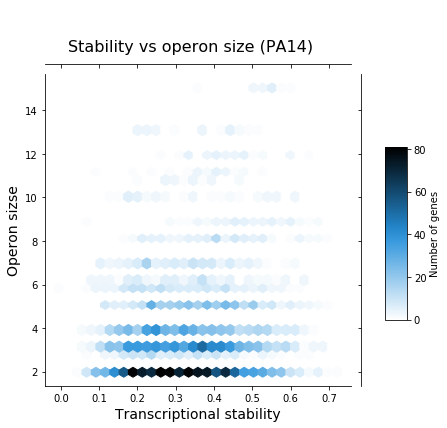

In [17]:
fig = sns.jointplot(
    data=pa14_similarity_operon,
    x="Transcriptional similarity across strains",
    y="operon_size",
    kind="hex",
    marginal_kws={"color": "white", "edgecolor": "white"},
)

cbar_ax = fig.fig.add_axes([0.9, 0.25, 0.05, 0.4])  # x, y, width, height
cb = plt.colorbar(cax=cbar_ax)
cb.set_label("Number of genes")

fig.set_axis_labels(
    "Transcriptional stability",
    "Operon sizse",
    fontsize=14,
    fontname="Verdana",
)
fig.fig.suptitle(
    "Stability vs operon size (PA14)", fontsize=16, fontname="Verdana", y=0.9, x=0.45
)

fig.savefig(
    "corr_stability_vs_operon_size_pa14.svg",
    format="svg",
    bbox_inches="tight",
    transparent=True,
    pad_inches=0,
    dpi=300,
)

In [18]:
# Compare the median distribution of transcriptional similarity score for
# genes in operons vs genes not within an operon
pao1_similarity_non_operon = pao1_similarity_operon[
    pao1_similarity_operon["operon_name"].isna()
].index
pao1_similarity_operon_only = pao1_similarity_operon[
    ~pao1_similarity_operon["operon_name"].isna()
].index

pa14_similarity_non_operon = pa14_similarity_operon[
    pa14_similarity_operon["operon_name"].isna()
].index
pa14_similarity_operon_only = pa14_similarity_operon[
    ~pa14_similarity_operon["operon_name"].isna()
].index

In [19]:
pao1_similarity_operon.loc[pao1_similarity_non_operon][
    "Transcriptional similarity across strains"
]

PAO1 id
PA3190    0.257508
PA1065    0.329633
PA1605    0.265521
PA3397    0.356777
PA1802    0.593957
            ...   
PA4177    0.118617
PA4572    0.421532
PA1290    0.271891
PA3565    0.258059
PA1182    0.229389
Name: Transcriptional similarity across strains, Length: 1954, dtype: float64

In [20]:
pao1_similarity_operon.loc[pao1_similarity_operon_only][
    "Transcriptional similarity across strains"
]

PAO1 id
PA0118    0.290443
PA1859    0.143328
PA1009    0.549950
PA5003    0.507236
PA0955    0.567544
            ...   
PA2898    0.211449
PA2176    0.432309
PA1486    0.126977
PA2775    0.307410
PA2354    0.126658
Name: Transcriptional similarity across strains, Length: 3395, dtype: float64

In [21]:
print(pao1_similarity_non_operon.shape)
print(pao1_similarity_operon_only.shape)

(1954,)
(3395,)


In [22]:
print(pa14_similarity_non_operon.shape)
print(pa14_similarity_operon_only.shape)

(1965,)
(3382,)


In [23]:
# Add label for genes being within an operon or not
pao1_similarity_operon.loc[pao1_similarity_non_operon, "label"] = "non-operon"
pao1_similarity_operon.loc[pao1_similarity_operon_only, "label"] = "operon"

pa14_similarity_operon.loc[pa14_similarity_non_operon, "label"] = "non-operon"
pa14_similarity_operon.loc[pa14_similarity_operon_only, "label"] = "operon"

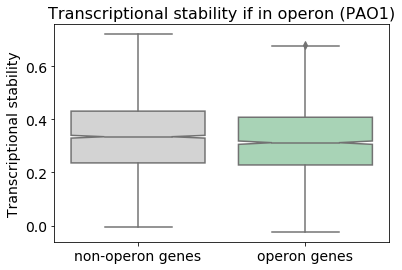

In [24]:
# Plot coverage distribution given list of generic coverage, specific coverage
pao1_box_fig = sns.boxplot(
    data=pao1_similarity_operon,
    x="label",
    y="Transcriptional similarity across strains",
    notch=True,
    palette=["lightgrey", "#a1dab4"],
)

pao1_box_fig.set_xlabel(None)
pao1_box_fig.set_xticklabels(
    ["non-operon genes", "operon genes"], fontsize=14, fontname="Verdana"
)
pao1_box_fig.set_ylabel(
    textwrap.fill("Transcriptional stability", width=30),
    fontsize=14,
    fontname="Verdana",
)
pao1_box_fig.tick_params(labelsize=14)
pao1_box_fig.set_title(
    "Transcriptional stability if in operon (PAO1)", fontsize=16, fontname="Verdana"
)

pao1_box_fig.figure.savefig(
    "box_stability_vs_operon_size_pao1.svg",
    format="svg",
    bbox_inches="tight",
    transparent=True,
    pad_inches=0,
    dpi=300,
)

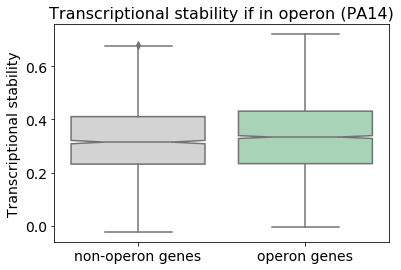

In [25]:
pa14_box_fig = sns.boxplot(
    data=pa14_similarity_operon,
    x="label",
    y="Transcriptional similarity across strains",
    notch=True,
    palette=["lightgrey", "#a1dab4"],
)

pa14_box_fig.set_xlabel(None)
pa14_box_fig.set_xticklabels(
    ["non-operon genes", "operon genes"], fontsize=14, fontname="Verdana"
)
pa14_box_fig.set_ylabel(
    textwrap.fill("Transcriptional stability", width=30),
    fontsize=14,
    fontname="Verdana",
)
pa14_box_fig.tick_params(labelsize=14)
pa14_box_fig.set_title(
    "Transcriptional stability if in operon (PA14)", fontsize=16, fontname="Verdana"
)

pa14_box_fig.figure.savefig(
    "box_stability_vs_operon_size_pa14.svg",
    format="svg",
    bbox_inches="tight",
    transparent=True,
    pad_inches=0,
    dpi=300,
)